<a href="https://colab.research.google.com/github/AkshataKishore/Fetal_Health-Classfication/blob/main/Interactive_Fetal_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive"
%cd /content/drive/My Drive/

In [ ]:

import pandas as pd
import numpy as np

from joblib import dump, load
import pickle


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  MinMaxScaler

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.gaussian_process import GaussianProcessClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import seaborn as sns


import warnings
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot') # random state
SEED=100
time_start_notebook = time.time()
home = os.path.expanduser('~')
[(x.__name__,x.__version__) for x in [np,pd,sns]]

In [ ]:
%%capture
# capture will not print in notebook

import os
import sys
ENV_COLAB = 'google.colab' in sys.modules

if ENV_COLAB:
    ## model evaluation
    !pip install -U watermark
    !pip install -U xgboost
    !pip install -U eli5
    !pip install -U shap
    !pip install -U pdpbox
    !pip install -U yellowbrick
    !pip install -U lime
    ! pip install altair
    #### print
    print('Environment: Google Colaboratory.')

In [ ]:
data = pd.read_csv('fetal_health.csv')

In [ ]:
data.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:301: UserWarning:

Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.

/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:301: UserWarning:

Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.



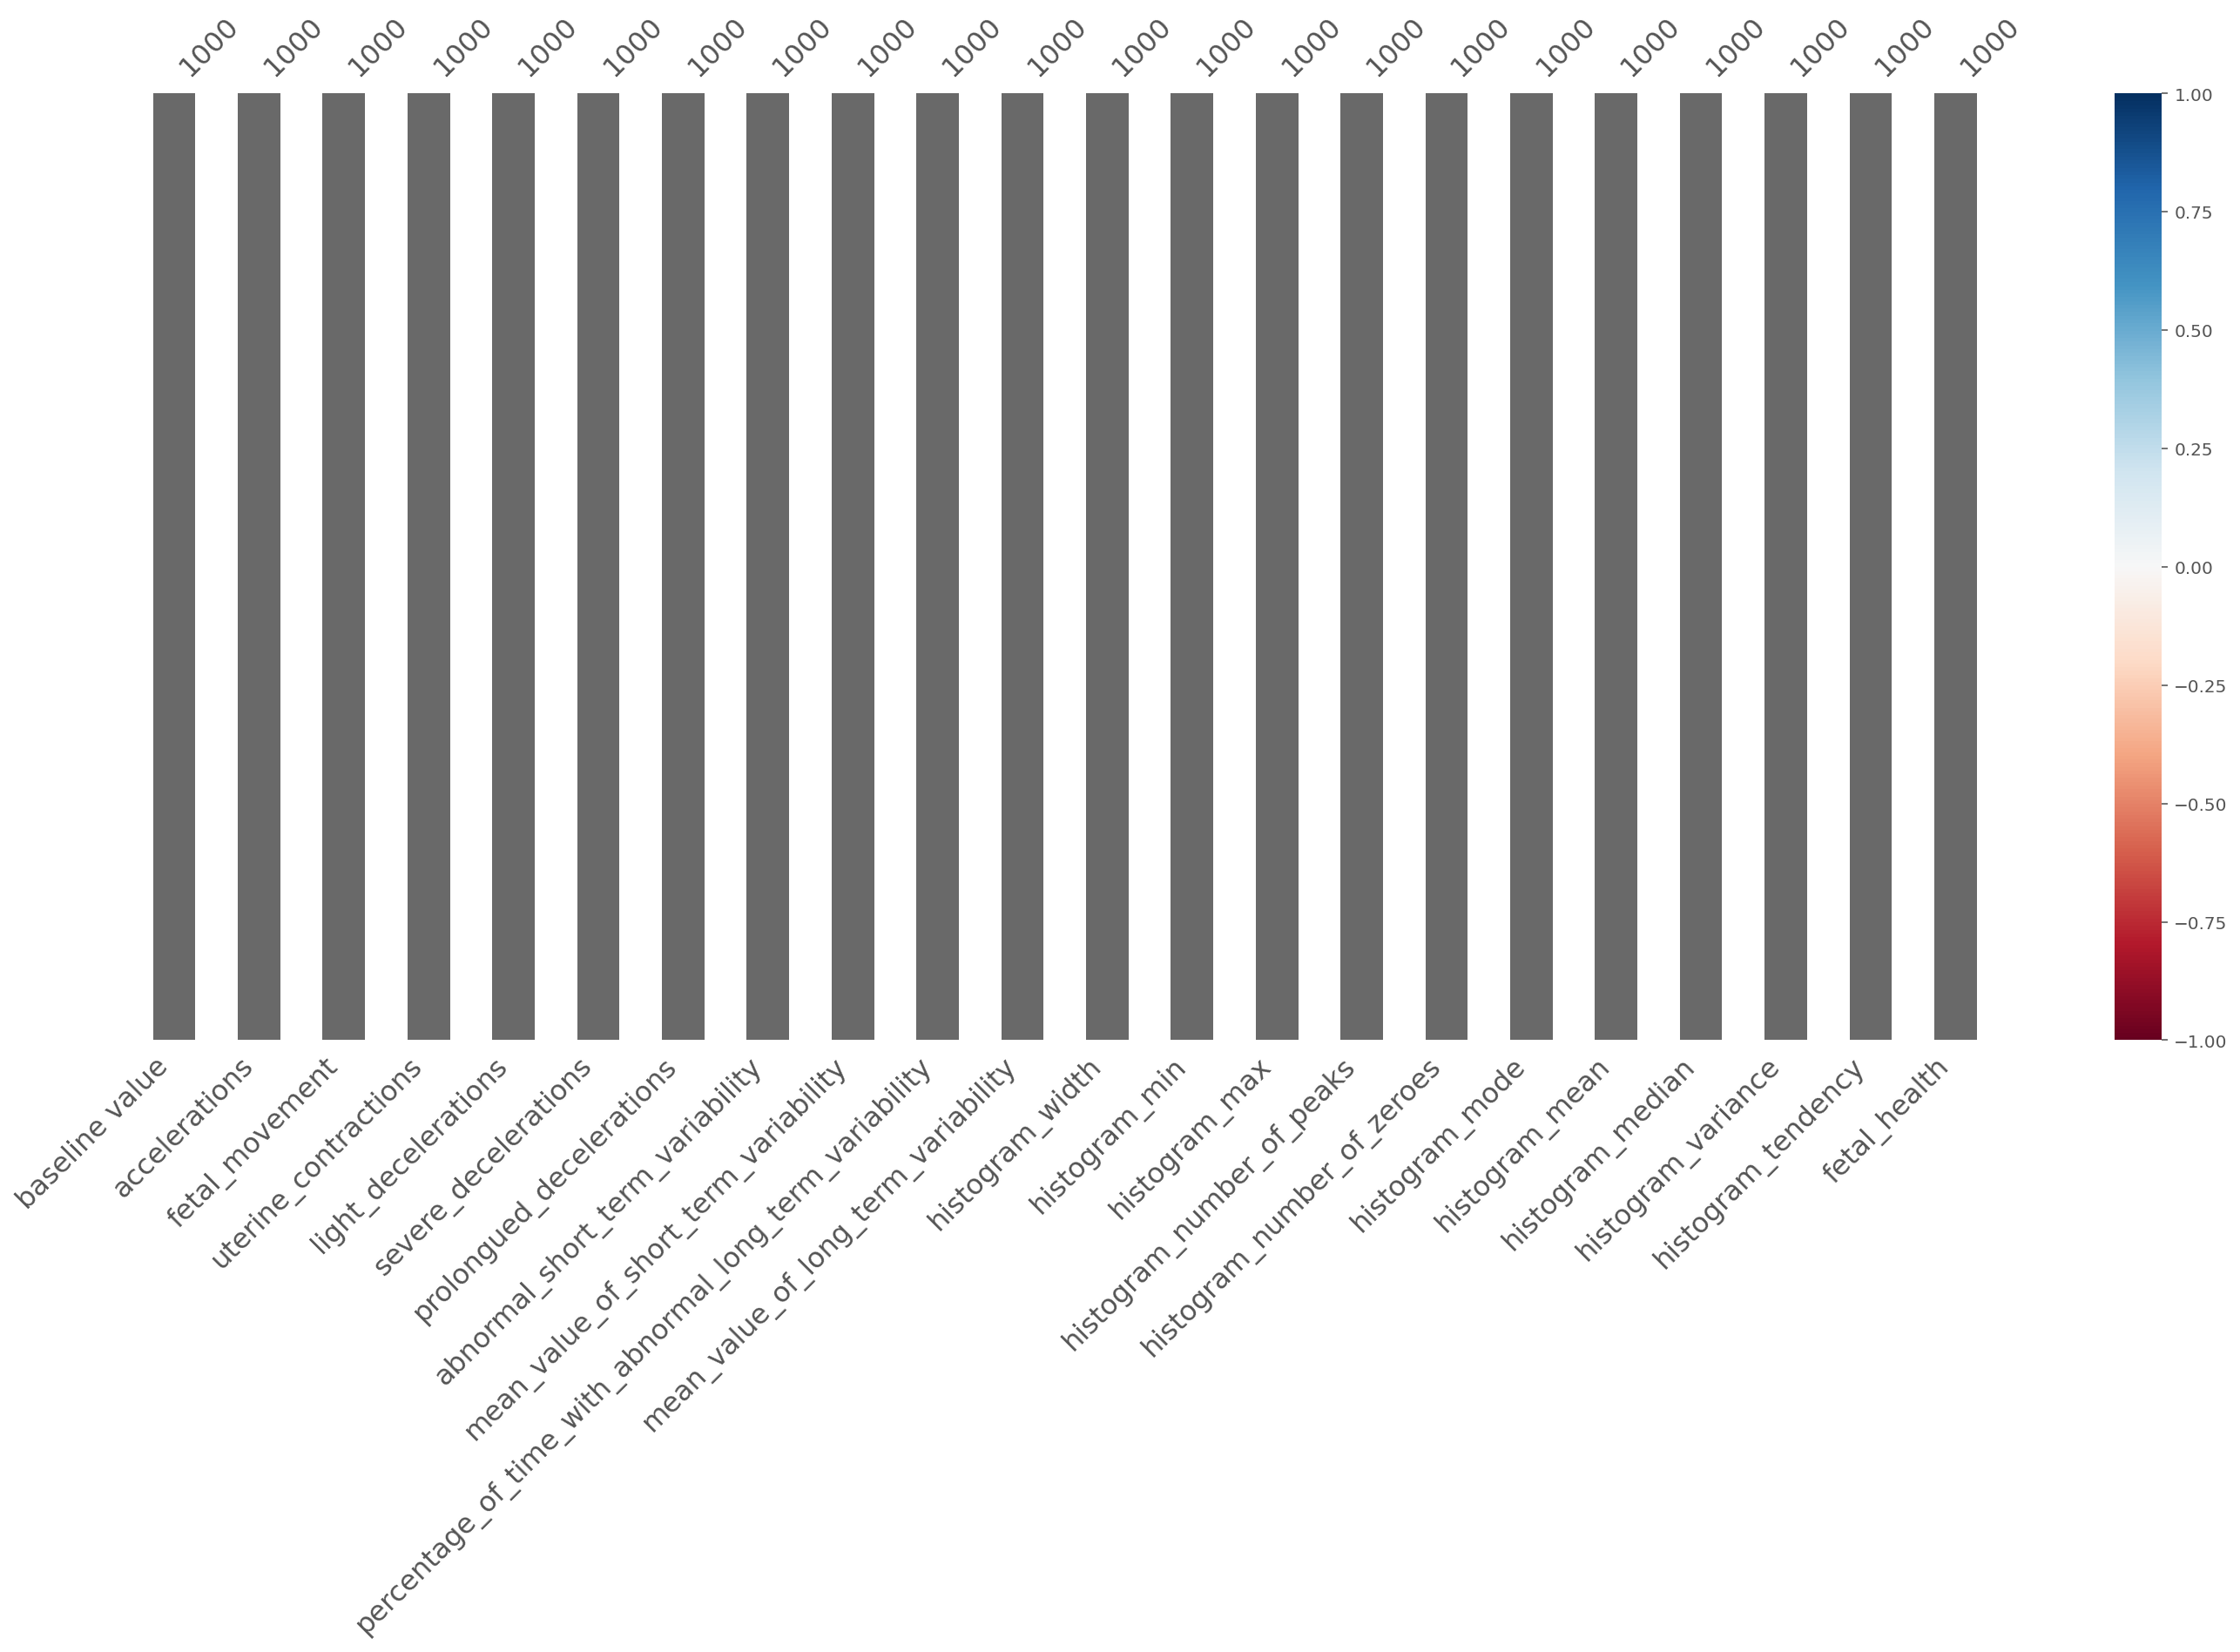

In [ ]:
%matplotlib inline
import missingno as msno
msno.heatmap(data)
msno.bar(data.sample(1000))

In [48]:
def scale(data): 
    min_max_scaler = MinMaxScaler()
    scaled_data =  min_max_scaler.fit_transform(data) 
    return scaled_data

In [49]:
drop_col = ['fetal_health', 'histogram_width', 'histogram_min', 'histogram_max',
            'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode','histogram_median', 
            'histogram_mean', 'histogram_variance', 'histogram_tendency'  ]
X = data.drop(drop_col, axis=1)
y = pd.DataFrame(data['fetal_health'])
y = y.astype('int')

predictions = {1: "Normal", 2 : "Suspect", 3: "Pathological"}

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [51]:
from sklearn.model_selection import train_test_split

target = 'fetal_health'

df_Xtrain, df_Xtest, ser_ytrain, ser_ytest = train_test_split(
    data.drop(target,axis=1), data[target],
    test_size=0.2, random_state=SEED, stratify=data[target])

ytrain = ser_ytrain.to_numpy().ravel()
ytest = ser_ytest.to_numpy().ravel()

features_train = df_Xtrain.columns.to_list()
features_train

['baseline value',
 'accelerations',
 'fetal_movement',
 'uterine_contractions',
 'light_decelerations',
 'severe_decelerations',
 'prolongued_decelerations',
 'abnormal_short_term_variability',
 'mean_value_of_short_term_variability',
 'percentage_of_time_with_abnormal_long_term_variability',
 'mean_value_of_long_term_variability',
 'histogram_width',
 'histogram_min',
 'histogram_max',
 'histogram_number_of_peaks',
 'histogram_number_of_zeroes',
 'histogram_mode',
 'histogram_mean',
 'histogram_median',
 'histogram_variance',
 'histogram_tendency']

In [52]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [53]:
from explainerdashboard.datasets import titanic_survive, titanic_names
from sklearn.ensemble import RandomForestClassifier
from explainerdashboard import ClassifierExplainer, ExplainerDashboard
ExplainerDashboard(ClassifierExplainer(RandomForestClassifier().fit(df_Xtrain, ser_ytrain), df_Xtest, ser_ytest)).run()

Note: shap=='guess' so guessing for RandomForestClassifier shap='tree'...
Detected RandomForestClassifier model: Changing class type to RandomForestClassifierExplainer...
Note: model_output=='probability', so assuming that raw shap output of RandomForestClassifier is in probability space...
Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
Generating layout...
Calculating shap values...
Calculating dependencies...
Calculating categorical permutation importances (if slow, try setting n_jobs parameter)...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating predictions...
Calculating prediction probabilities...
Calculating pred_percentiles...
Calculating shap interaction values...
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the

<IPython.core.display.Javascript object>